In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
import os
import sys
import nba_api
from nba_api.stats.endpoints import playergamelog
from nba_api.stats.static import players
from nba_api.stats.static import teams 
from nba_api.stats.library.parameters import SeasonAll
# turn off warnings
import warnings
warnings.filterwarnings('ignore')

# NBA Player Distribution Tool

This will be a streamlit. I need these functionalities:

- [ ] Select a player
- [ ] Select career, season, last 25 games, last 10 games
- [ ] Show a violin plot of the distribution of the selected player's stats (Points, Rebounds, and Assists)
- [ ] Show a joint plot of the same


In [ ]:
#pip install nba_api

In [2]:
selected_player = 'LeBron James'
date_start = '2020-10-01'
chosen_stat = 'PTS'

In [3]:
player_dict = players.get_players()
# get current players
player = [player for player in player_dict if player['full_name'] == selected_player][0]
player_id = player['id']
gamelog_player_all = playergamelog.PlayerGameLog(player_id=player_id, season = SeasonAll.all)

df_player_games_all = gamelog_player_all.get_data_frames()
df_player_games_all = df_player_games_all[0]
df_player_games_all['GAME_DATE'] = pd.to_datetime(df_player_games_all['GAME_DATE'])
df_player_games_all= df_player_games_all[df_player_games_all['GAME_DATE'] > date_start]

In [ ]:
df_player_games_all.columns

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

In [ ]:
# filter out games with < 20 minutes played
df_player_games_all = df_player_games_all[df_player_games_all['MIN'] > 25]

In [ ]:
# get 20% 
cdf_value = df_player_games_all[chosen_stat].quantile(0.25)
print(cdf_value)



23.0


In [ ]:
df_player_games_all

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22022,2544,0022200655,2023-01-15,LAL vs. PHI,L,35,15,23,0.652,...,8,8,10,1,1,3,1,35,19,1
1,22022,2544,0022200630,2023-01-12,LAL vs. DAL,L,47,9,28,0.321,...,10,16,9,2,0,3,0,24,-3,1
2,22022,2544,0022200595,2023-01-07,LAL @ SAC,W,38,14,28,0.500,...,7,8,7,1,0,4,2,37,15,1
3,22022,2544,0022200590,2023-01-06,LAL vs. ATL,W,33,10,19,0.526,...,7,7,10,0,0,5,0,25,12,1
4,22022,2544,0022200551,2023-01-02,LAL @ CHA,W,40,16,26,0.615,...,11,11,6,1,0,3,1,43,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,22020,2544,0022000060,2020-12-30,LAL @ SAS,W,35,11,23,0.478,...,5,5,8,1,1,2,1,26,-1,1
130,22020,2544,0022000045,2020-12-28,LAL vs. POR,L,36,11,20,0.550,...,7,9,6,2,1,3,2,29,0,1
131,22020,2544,0022000040,2020-12-27,LAL vs. MIN,W,26,6,13,0.462,...,9,9,5,1,0,4,1,18,16,1
132,22020,2544,0022000008,2020-12-25,LAL vs. DAL,W,31,8,18,0.444,...,6,7,10,1,0,4,0,22,16,1


In [ ]:
last_10_games = df_player_games_all.tail(10)
last_20_games = df_player_games_all.tail(20)

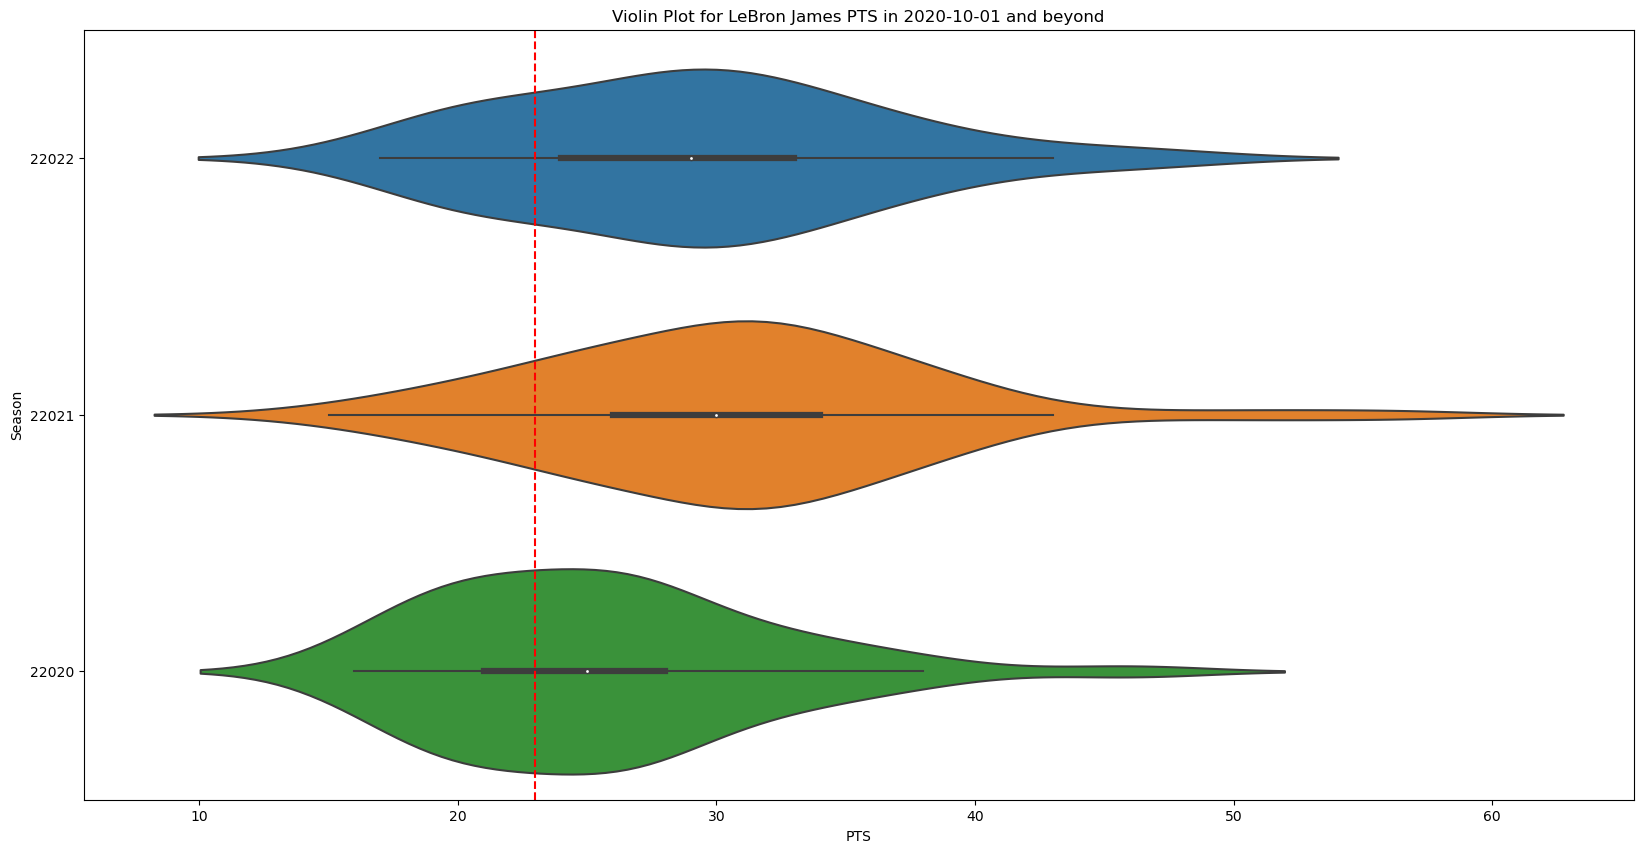

In [ ]:
# Plot violin plots for all stats
fig, ax = plt.subplots(figsize=(20,10))
# violin plot for all stats
sns.violinplot(data=df_player_games_all, x=chosen_stat, y='SEASON_ID', ax=ax)
# add line for 20% percentile
ax.axvline(cdf_value, color='red', linestyle='--')
# add title
ax.set_title('Violin Plot for ' + selected_player + ' ' + chosen_stat + ' in ' + date_start + ' and beyond')
# add labels
ax.set_xlabel(chosen_stat)
ax.set_ylabel('Season')
# show plot
plt.show()

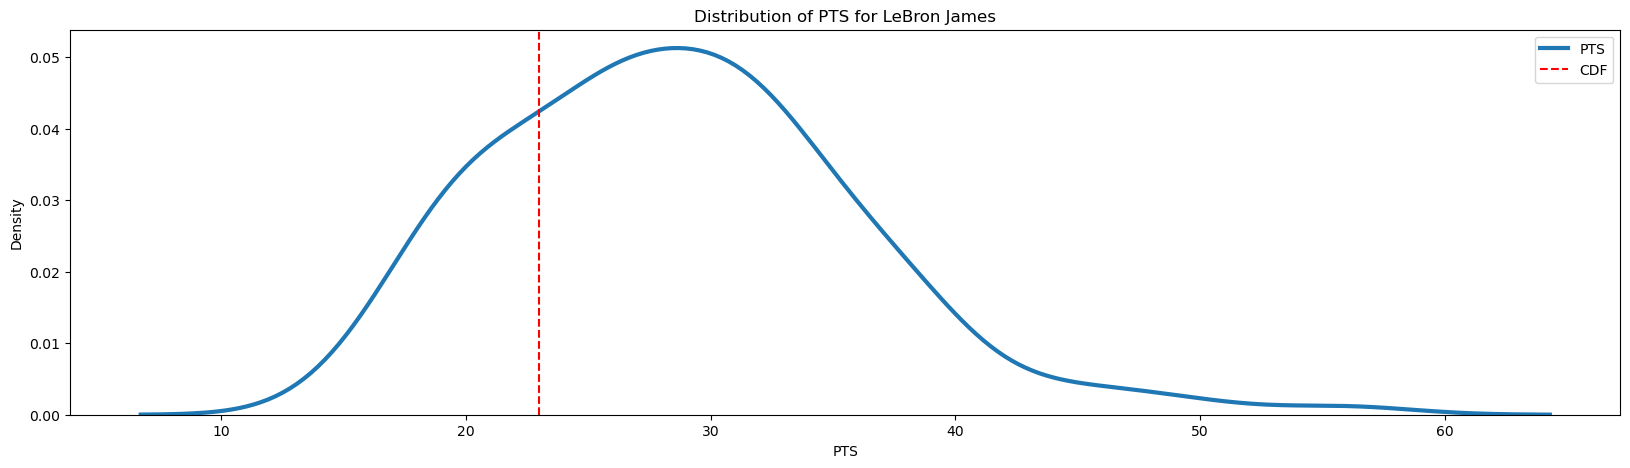

In [ ]:
# plot pdf of MIN
plt.rcParams['figure.figsize'] = [20, 5]
sns.distplot(df_player_games_all[chosen_stat], hist=False, kde=True,
                kde_kws = {'linewidth': 3},
                label = chosen_stat)
plt.axvline(x=cdf_value, color='r', linestyle='--', label='CDF')    
plt.title('Distribution of ' + chosen_stat + ' for ' + selected_player)
plt.xlabel(chosen_stat)
plt.ylabel('Density')
plt.legend()
plt.show()
# make note that red line is 20% percentile





Text(0.5, 1.0, 'Cumulative Distribution of PTS for LeBron James')

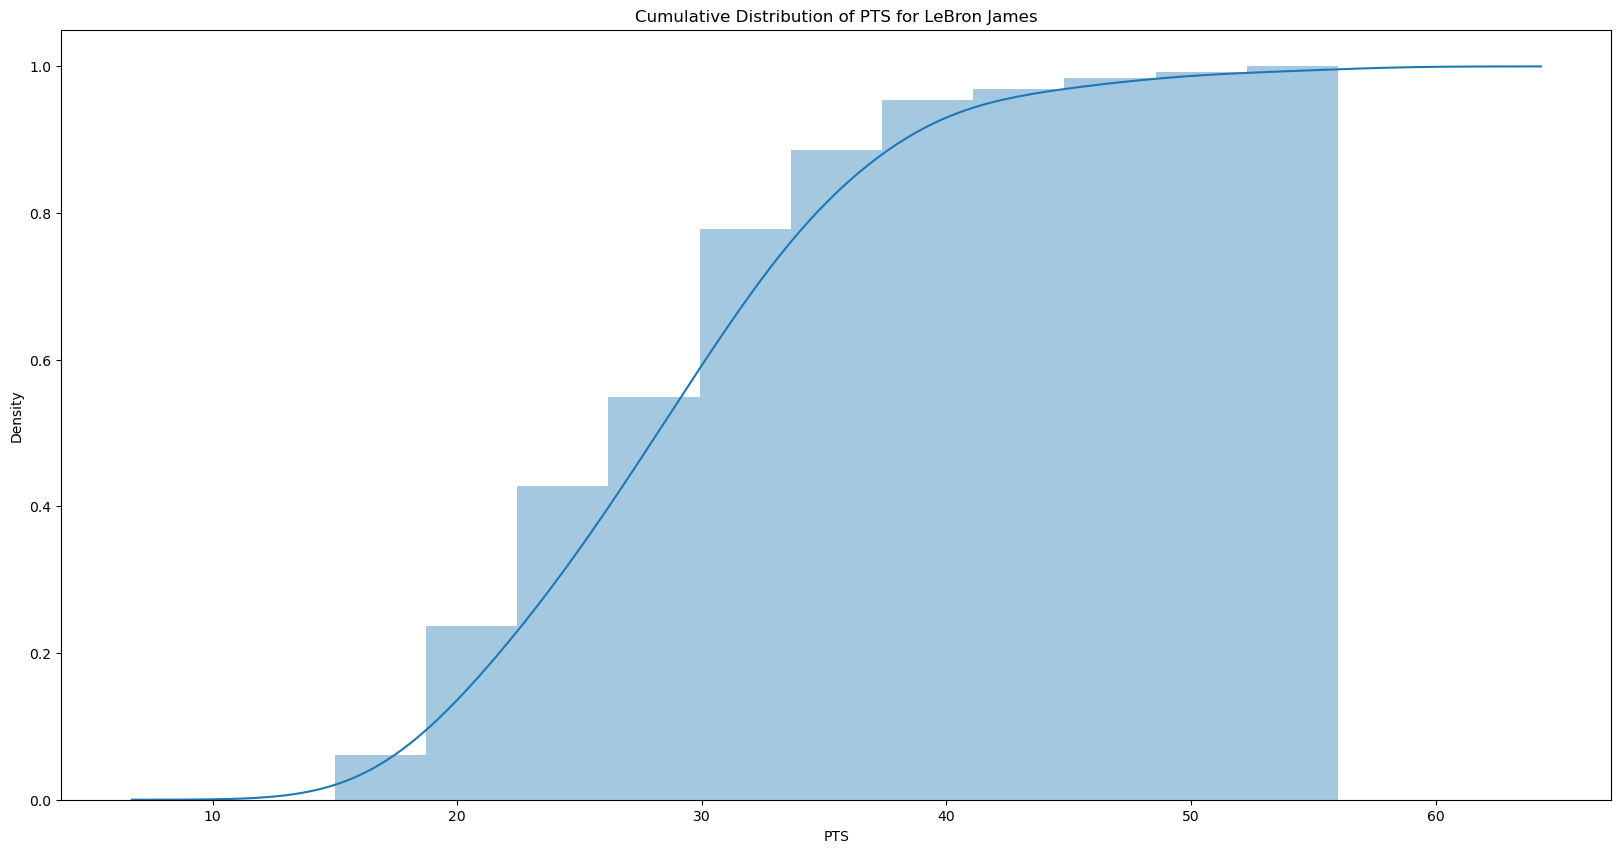

In [ ]:
# make plot large
plt.rcParams['figure.figsize'] = [20, 10]
sns.distplot(df_player_games_all[chosen_stat], hist_kws=dict(cumulative=True),
                kde_kws=dict(cumulative=True),
                label = chosen_stat)
                
plt.title('Cumulative Distribution of ' + chosen_stat + ' for ' + selected_player)

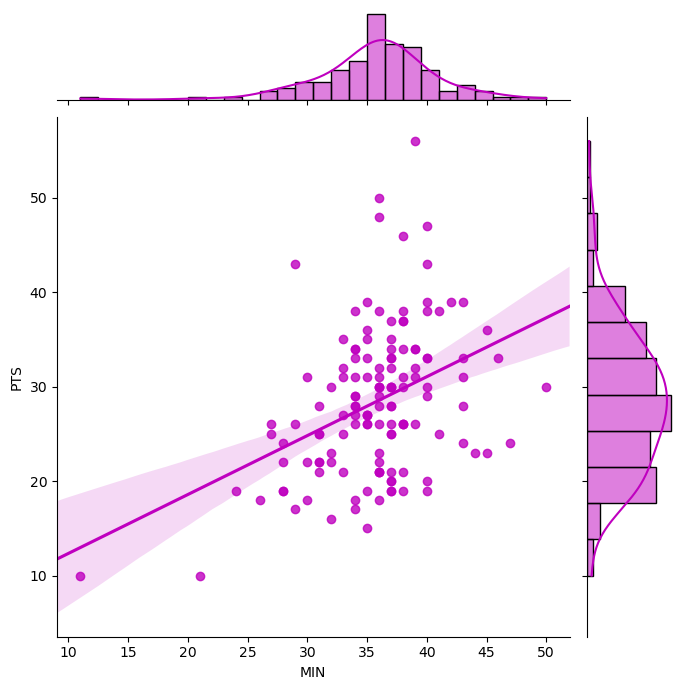

In [4]:
# plot correlation between points and minutes
sns.jointplot(x=df_player_games_all['MIN'], y=df_player_games_all[chosen_stat], kind="reg", truncate=False,
                color="m", height=7)